In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
plt.rcParams['figure.dpi']=70
plt.rcParams['savefig.dpi']=300

In [3]:
import seaborn as sns
#settings
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, "savefig.dpi":300})
sns.set_context("notebook")

In [63]:
data0 = pd.read_csv("DATA.csv")
data0.head()

,entity_id,entity_type,appearsInJournal,rank_P,referenceCount_P,appearsInConferenceInstance,citationCount_P,entity_idF,fos_list,dcterms_creator,...,citationCount_CI,entity_id_C,rank_C,paperCount_C,citationCount_CS,entity_id_CS,rank_J,paperCount_J,citationCount_J,entity_id_J
0,6320,NaN,NaN,24657,1,NaN,0,2778716859,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6320,NaN,NaN,24657,1,NaN,0,29456083,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6320,NaN,NaN,24657,1,NaN,0,71924100,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,139580,NaN,NaN,24050,5,NaN,0,3017626604,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139580,NaN,NaN,24050,5,NaN,0,2779134260,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Reference = data0['entity_id'].value_counts().rename_axis('entity_id').reset_index(name='Paper_Auth_Num')
Reference.head()

In [5]:
Paper_Auth_Num = data0['entity_id'].value_counts().rename_axis('entity_id').reset_index(name='Paper_Auth_Num')
Paper_Auth_Num.head()

,entity_id,Paper_Auth_Num
0,5889370,4114
1,6392330,832
2,245130620,453
3,33187090,370
4,94870250,256


In [6]:
data = pd.merge(data0,Paper_Auth_Num,how="left")

In [7]:
data['Cite_per_P'] = data.citationCount_A / data.paperCount_A

In [8]:
print(data.shape)
data.head()

(412393, 30)


,entity_id,entity_type,appearsInJournal,rank_P,referenceCount_P,appearsInConferenceInstance,citationCount_P,entity_idF,fos_list,dcterms_creator,...,rank_C,paperCount_C,citationCount_CS,entity_id_CS,rank_J,paperCount_J,citationCount_J,entity_id_J,Paper_Auth_Num,Cite_per_P
0,6320,NaN,NaN,24657,1,NaN,0,2778716859,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,17.600000
1,6320,NaN,NaN,24657,1,NaN,0,29456083,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,17.600000
2,6320,NaN,NaN,24657,1,NaN,0,71924100,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,17.600000
3,139580,NaN,NaN,24050,5,NaN,0,3017626604,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,17.737805
4,139580,NaN,NaN,24050,5,NaN,0,2779134260,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,17.737805


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412393 entries, 0 to 412392
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   entity_id                    412393 non-null  int64  
 1   entity_type                  210627 non-null  object 
 2   appearsInJournal             157662 non-null  float64
 3   rank_P                       412393 non-null  int64  
 4   referenceCount_P             412393 non-null  int64  
 5   appearsInConferenceInstance  4647 non-null    float64
 6   citationCount_P              412393 non-null  int64  
 7   entity_idF                   412393 non-null  int64  
 8   fos_list                     412393 non-null  object 
 9   dcterms_creator              412393 non-null  float64
 10  entity_id_A                  412393 non-null  float64
 11  rank_A                       412393 non-null  float64
 12  paperCount_A                 412393 non-null  float64
 13 

In [10]:
data_corr = data[data.columns[[0,3,4,6,8,9,11,12,13,17,18,19,20,21,22,23,24,25,26,27,28,29]]]
#data_corr.corr()

<AxesSubplot:>

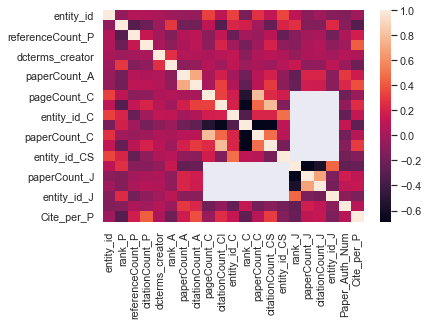

In [11]:
sns.heatmap(data_corr.corr())
#plt.title("Correlations Heatmap")

# Find COAUTHOR Stats - Network

In [12]:
#FIND NUMBER OF UNIQUE CO_AUTHORS
df = data #
auth = data[data.columns[[0,8,9,11,12,13,20,24,29]]]
df = df.join(df.groupby('entity_id')['dcterms_creator'].apply(set).rename('new'), 'entity_id')

df['new'] = [b - set([a]) for a, b in zip(df['dcterms_creator'], df['new'])]

df = (df[df['new'].astype(bool)].groupby('dcterms_creator')['new']
          .apply(lambda x: tuple(set([z for y in x for z in y])))
          .to_frame())

df.insert(0, 'Num_Unique_CoAuthors', df['new'].str.len())

auth_uniq = pd.DataFrame(df,index=None)
auth_uniq.reset_index(inplace=True)

print(auth_uniq.shape)
auth_uniq.head()

(86076, 3)


,dcterms_creator,Num_Unique_CoAuthors,new
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280..."
1,758859.0,2,"(2132930452.0, 2110535015.0)"
2,1011029.0,5,"(2041291329.0, 2144823554.0, 2133763109.0, 302..."
3,1341902.0,1,"(2614587889.0,)"
4,1792001.0,9,"(2764590720.0, 2126783685.0, 191893929.0, 1941..."


In [13]:
s = auth_uniq.apply(lambda x: pd.Series(x['new']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'coauth'
s.head()
#auth_uniq.drop('new', axis=1).join(s)

0    2.620315e+09
0    3.012604e+09
0    2.114906e+09
0    2.806220e+09
0    2.129303e+09
Name: coauth, dtype: float64

In [14]:
s = pd.DataFrame(s)
s.head()
auth_net = auth_uniq.join(s);
auth_net.head()

,dcterms_creator,Num_Unique_CoAuthors,new,coauth
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",3.012604e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.114906e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.806220e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.129303e+09


In [15]:
rank = data[data.columns[[3,4,6,8,9,11,12,13,28,29]]]

In [16]:
rank.head()

,rank_P,referenceCount_P,citationCount_P,fos_list,dcterms_creator,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P
0,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0,3,17.600000
1,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0,3,17.600000
2,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0,3,17.600000
3,24050,5,0,Medicine,1.852443e+09,21075.0,328.0,5818.0,9,17.737805
4,24050,5,0,Medicine,1.852443e+09,21075.0,328.0,5818.0,9,17.737805


In [17]:
auth_net.head()

,dcterms_creator,Num_Unique_CoAuthors,new,coauth
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",3.012604e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.114906e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.806220e+09
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.129303e+09


In [18]:
auth_net0 = auth_net[auth_net.columns[[0,1,3]]]

In [19]:
rank_net = pd.merge(auth_net,rank,how="left",left_on="dcterms_creator",right_on='dcterms_creator')
rank_net.drop_duplicates();

In [20]:
#rank_net["Connection"] = pd.Series([rank_net.dcterms_creator, rank_net.coauth])

x = rank_net['dcterms_creator'].tolist()
y = rank_net['coauth'].tolist()
p = []
for val in range(len(x)):
    p.append((x[val], y[val]))

rank_net["Connections"] = p
rank_net.head(3)

,dcterms_creator,Num_Unique_CoAuthors,new,coauth,rank_P,referenceCount_P,citationCount_P,fos_list,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P,Connections
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09,21219,18,6,Geology,15554.0,121.0,1555.0,12,12.85124,"(400978.0, 2620315329.0)"
1,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09,21219,18,6,Geography,15554.0,121.0,1555.0,12,12.85124,"(400978.0, 2620315329.0)"
2,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09,23776,11,0,Geography,15554.0,121.0,1555.0,4,12.85124,"(400978.0, 2620315329.0)"


In [21]:
counts = pd.DataFrame(rank_net['Connections'].value_counts(), index=None)

In [22]:
counts.reset_index(inplace=True)
counts = counts.rename(columns = {'index':'Pair'})

counts.head()

,Pair,Connections
0,"(2140603027.0, 2156231434.0)",40
1,"(2140603027.0, 2305646286.0)",40
2,"(2140603027.0, 2565189425.0)",40
3,"(2140603027.0, 2084366337.0)",40
4,"(2140603027.0, 2300966400.0)",40


In [23]:
pair_net = pd.merge(counts, rank_net, how='left',left_on='Pair',right_on='Connections')
pair_net.pop('Connections_y')
pair_net = pair_net.rename(columns = {'Connections_x':'Collab_Num'})

pair_net.head(3)

,Pair,Collab_Num,dcterms_creator,Num_Unique_CoAuthors,new,coauth,rank_P,referenceCount_P,citationCount_P,fos_list,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P
0,"(2140603027.0, 2156231434.0)",40,2.140603e+09,12,"(2300966400.0, 2131333025.0, 2563650018.0, 208...",2.156231e+09,20452,16,26,Chemistry,18902.0,10.0,104.0,170,10.4
1,"(2140603027.0, 2156231434.0)",40,2.140603e+09,12,"(2300966400.0, 2131333025.0, 2563650018.0, 208...",2.156231e+09,20452,16,26,Chemistry,18902.0,10.0,104.0,170,10.4
2,"(2140603027.0, 2156231434.0)",40,2.140603e+09,12,"(2300966400.0, 2131333025.0, 2563650018.0, 208...",2.156231e+09,20452,16,26,Chemistry,18902.0,10.0,104.0,170,10.4


In [65]:
collab_chart = pd.DataFrame(pair_net.groupby("fos_list").agg({'Collab_Num': ['mean']}))
collab_chart
#, 'min', 'max','std','count'

,Collab_Num
,mean
fos_list,
Art,3.079450
Biology,8.566550
Business,3.853292
Chemistry,8.998976
Computer science,8.160997
Economics,6.577705
Engineering,8.678286
Environmental science,2.518916


In [25]:
#pair_net.groupby("fos_list").boxplot(by='Collab_Num')

Show above as a box plot or as a bar graph with whiskers

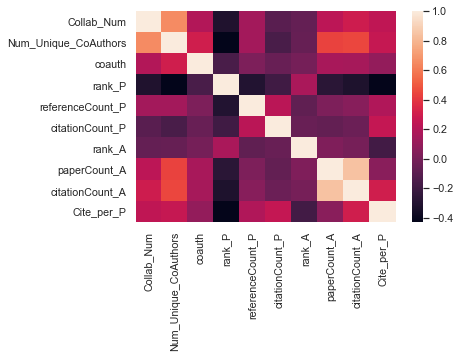

In [26]:
pair_net_corr = pair_net[pair_net.columns[[1,3,4,5,6,7,8,9,10,11,12,14]]]
sns.heatmap(pair_net_corr.corr());

In [27]:
pair_net_corr.groupby('fos_list')[['rank_P','Collab_Num','Num_Unique_CoAuthors','Cite_per_P']].corr().unstack()#.iloc[:,1]

rank_P                                             \
                      rank_P Collab_Num Num_Unique_CoAuthors Cite_per_P   
fos_list                                                                  
Art                      1.0   0.207006            -0.230546  -0.388506   
Biology                  1.0  -0.100162            -0.608276  -0.384989   
Business                 1.0  -0.019772            -0.097962  -0.475151   
Chemistry                1.0  -0.530671            -0.527338  -0.546374   
Computer science         1.0  -0.287052            -0.035628  -0.257521   
Economics                1.0   0.001908            -0.161628  -0.374504   
Engineering              1.0  -0.107535            -0.145581  -0.279705   
Environmental science    1.0   0.036717            -0.311122  -0.374895   
Geography                1.0  -0.092885             0.065628  -0.366712   
Geology                  1.0   0.057204            -0.188763  -0.355286   
History                  1.0   0.031250            -0.028654  -0.388711   
Materials science        1.0   0.195719            -0.222033  -0.328207   
Mathematics              1.0  -0.014473            -0.003879  -0.291314   
Medicine                 1.0  -0.074535            -0.579334  -0.517531   
Philosophy               1.0  -0.039025            -0.122395  -0.326490   
Physics                  1.0  -0.164031            -0.588274  -0.321108   
Political science        1.0  -0.030581             0.009313  -0.315820   
Psychology               1.0  -0.112022            -0.090790  -0.388104   
Sociology                1.0   0.179919            -0.175357  -0.339613   

                      Collab_Num                                             \
                          rank_P Collab_Num Num_Unique_CoAuthors Cite_per_P   
fos_list                                                                      
Art                     0.207006        1.0            -0.179979  -0.151882   
Biology                -0.100162        1.0            -0.080316   0.058293   
Business               -0.019772        1.0            -0.260014  -0.016221   
Chemistry              -0.530671        1.0             0.566421   0.378450   
Computer science       -0.287052        1.0            -0.164234   0.053007   
Economics               0.001908        1.0            -0.246386   0.011770   
Engineering            -0.107535        1.0             0.004276   0.065443   
Environmental science   0.036717        1.0             0.048673   0.071255   
Geography              -0.092885        1.0             0.075783   0.129640   
Geology                 0.057204        1.0            -0.088268   0.008824   
History                 0.031250        1.0             0.029548  -0.070384   
Materials science       0.195719        1.0            -0.118933  -0.029847   
Mathematics            -0.014473        1.0             0.106509   0.039473   
Medicine               -0.074535        1.0            -0.248880  -0.029337   
Philosophy             -0.039025        1.0            -0.172588   0.111626   
Physics                -0.164031        1.0             0.706012   0.367426   
Political science      -0.030581        1.0            -0.081643  -0.016302   
Psychology             -0.112022        1.0            -0.185093   0.100237   
Sociology               0.179919        1.0             0.070509  -0.018219   

                      Num_Unique_CoAuthors                                  \
                                    rank_P Collab_Num Num_Unique_CoAuthors   
fos_list                                                                     
Art                              -0.230546  -0.179979                  1.0   
Biology                          -0.608276  -0.080316                  1.0   
Business                         -0.097962  -0.260014                  1.0   
Chemistry                        -0.527338   0.566421                  1.0   
Computer science                 -0.035628  -0.164234                  1.0   
Economic

In [28]:
pair_net_corr.groupby('fos_list')[['rank_P','Collab_Num']].corr().unstack().iloc[:,1]
#Super Negative Correlation within Chemistry and Computer Science, but Positive with Art and Materials Science

fos_list
Art                      0.207006
Biology                 -0.100162
Business                -0.019772
Chemistry               -0.530671
Computer science        -0.287052
Economics                0.001908
Engineering             -0.107535
Environmental science    0.036717
Geography               -0.092885
Geology                  0.057204
History                  0.031250
Materials science        0.195719
Mathematics             -0.014473
Medicine                -0.074535
Philosophy              -0.039025
Physics                 -0.164031
Political science       -0.030581
Psychology              -0.112022
Sociology                0.179919
Name: (rank_P, Collab_Num), dtype: float64

In [29]:
pair_net_corr.groupby('fos_list')[['rank_A','Collab_Num']].corr().unstack().iloc[:,1]

fos_list
Art                      0.119660
Biology                  0.008918
Business                -0.040347
Chemistry               -0.123003
Computer science        -0.069212
Economics                0.039202
Engineering             -0.016148
Environmental science    0.048560
Geography               -0.028958
Geology                  0.058835
History                  0.087977
Materials science        0.049634
Mathematics             -0.045973
Medicine                 0.001528
Philosophy              -0.017601
Physics                 -0.059832
Political science        0.009834
Psychology              -0.021486
Sociology                0.125956
Name: (rank_A, Collab_Num), dtype: float64

In [30]:
pair_net_corr.groupby('fos_list')[['rank_A','Num_Unique_CoAuthors']].corr().unstack().iloc[:,1]

fos_list
Art                     -0.050792
Biology                 -0.152659
Business                 0.081450
Chemistry               -0.087515
Computer science        -0.050483
Economics               -0.006363
Engineering             -0.008570
Environmental science   -0.080622
Geography               -0.034462
Geology                 -0.118361
History                  0.085795
Materials science       -0.034538
Mathematics              0.009765
Medicine                -0.120373
Philosophy               0.061989
Physics                 -0.067056
Political science        0.086700
Psychology              -0.046150
Sociology               -0.092211
Name: (rank_A, Num_Unique_CoAuthors), dtype: float64

In [31]:
print("Citations per Paper\n")
print(pair_net_corr.corr()['Cite_per_P'])
print("\nNumber of Unique Co-Authors")
pair_net_corr.corr()['Num_Unique_CoAuthors']

Citations per Paper

Collab_Num              0.242549
Num_Unique_CoAuthors    0.262770
coauth                  0.097206
rank_P                 -0.422772
referenceCount_P        0.192182
citationCount_P         0.258163
rank_A                 -0.184386
paperCount_A            0.064558
citationCount_A         0.303942
Cite_per_P              1.000000
Name: Cite_per_P, dtype: float64

Number of Unique Co-Authors


Collab_Num              0.654730
Num_Unique_CoAuthors    1.000000
coauth                  0.305787
rank_P                 -0.432606
referenceCount_P        0.149323
citationCount_P        -0.157236
rank_A                 -0.054088
paperCount_A            0.437716
citationCount_A         0.446719
Cite_per_P              0.262770
Name: Num_Unique_CoAuthors, dtype: float64

Findings:
1. If you have worked with one author many times, you are likely to have worked with many other authors.
2. More times worked with the same author is correlated to a lower paper rank.
3. Someone who works with the same author multiple times is more likely to cite and reference

PAPER RANK RESIDUAL

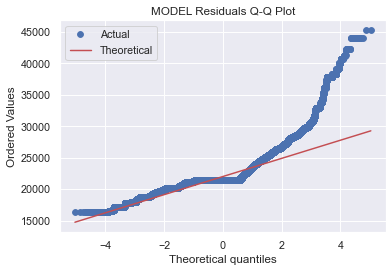

In [32]:
from scipy import stats
stats.probplot(pair_net.rank_P, dist="norm", plot= plt);
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
#Follows an exponential distribution

[-2.24492902e-03  9.87580322e+00]


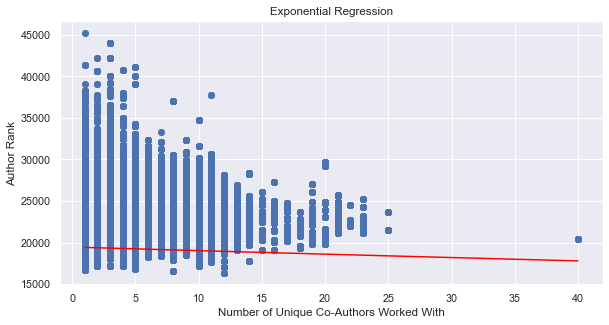

In [33]:
import math as m
fit = np.polyfit(pair_net.Collab_Num, np.log(pair_net.rank_A), 1)
print(fit)

y = []
for x in pair_net.Collab_Num.unique():
    value = m.exp(9.87580322e+00) * m.exp(-2.24492902e-03)**x
    y.append(value)

fig = plt.figure(figsize = (10, 5))
plt.scatter(pair_net.Collab_Num,pair_net.rank_P)
plt.plot(pair_net.Collab_Num.unique(), y,color ='red');
plt.ylabel('Author Rank')
plt.xlabel('Number of Unique Co-Authors Worked With')
plt.title("Exponential Regression")
#plt.yscale("log")
plt.show()

In [34]:
x = pair_net.iloc[:, 1:2].values
y = pair_net.iloc[:, 6:7].values


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit_transform(x_train)
sc_x.transform(x_test)

array([[-1.70117743],
       [ 0.60983547],
       [ 0.60983547],
       ...,
       [-1.99005405],
       [ 0.60983547],
       [-1.41230082]])

In [37]:
sc_y = StandardScaler()
sc_y.fit_transform(y_train)
sc_y.transform(y_test)

array([[-1.38699051],
       [-0.37014445],
       [-0.37014445],
       ...,
       [ 2.61193512],
       [-0.37014445],
       [ 0.32211348]])

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_transform = PolynomialFeatures(degree=3, include_bias=False)
x_poly_train = poly_transform.fit_transform(x_train)
x_poly_test = poly_transform.transform(x_test)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_poly_train, y_train)

LinearRegression()

In [40]:
x_grid_train = np.arange(min(x_train), max(x_train) + .01, step=0.01)
x_grid_test = np.arange(min(x_test), max(x_test) + .01, step=0.01)

In [41]:
x_grid_train = x_grid_train.reshape(len(x_grid_train), 1)
x_grid_test = x_grid_train.reshape(len(x_grid_test), 1)

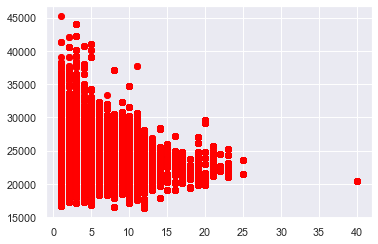

In [42]:
plt.scatter(x, y, color='red', label='Training Data Points')


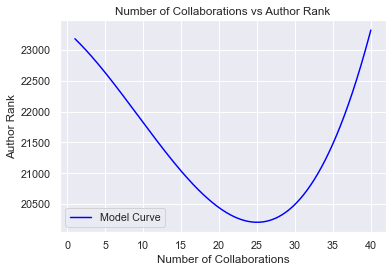

In [43]:
plt.plot(x_grid_train, regressor.predict(poly_transform.transform(x_grid_train)), color='blue', label='Model Curve')
plt.title('Number of Collaborations vs Author Rank')
plt.xlabel('Number of Collaborations')
plt.ylabel('Author Rank')
plt.legend()
plt.show()

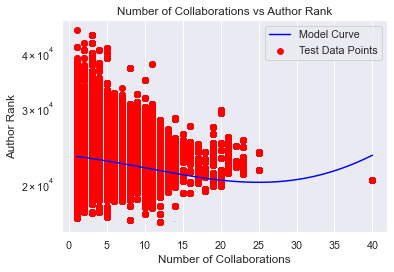

In [44]:
plt.scatter(x, y, color='red', label='Test Data Points')
plt.plot(x_grid_test, regressor.predict(poly_transform.transform(x_grid_test)), color='blue', label='Model Curve')
plt.title('Number of Collaborations vs Author Rank')
plt.xlabel('Number of Collaborations')
plt.ylabel('Author Rank')
plt.legend()
#plt.xscale("log")
plt.yscale("log")  
plt.show()
#POLYNOMIAL REGRESSION

In [45]:
prediction = regressor.predict(poly_transform.transform([[10]]))
print(prediction)

[[21822.76467978]]


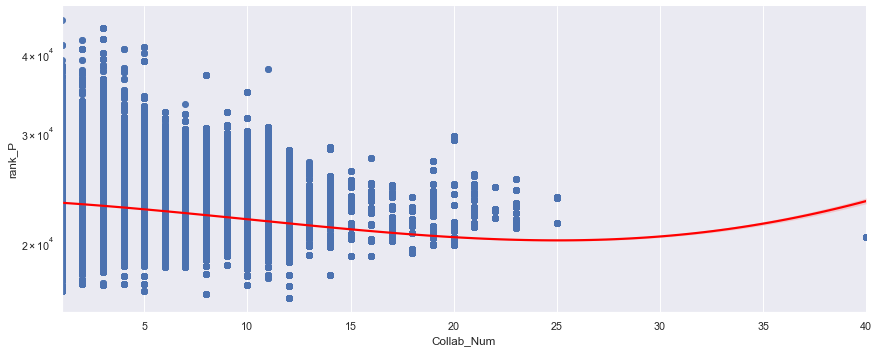

In [46]:
ax2 = sns.lmplot(x='Collab_Num',y='rank_P',aspect=2.5,data=pair_net,ci=95,order=3,fit_reg=True,line_kws={'color': 'red'});  
ax2.set(yscale="log")


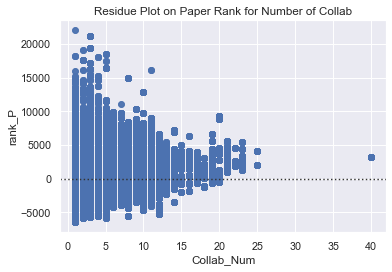

In [47]:
sns.residplot(y="rank_P", x="Collab_Num", data=pair_net)
plt.title("Residue Plot on Paper Rank for Number of Collab")
plt.show()

AUTHOR RANK RESIDUAL

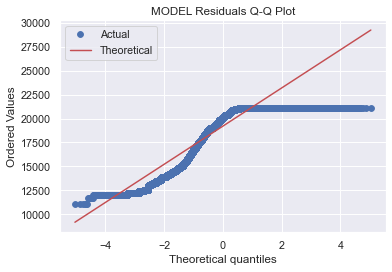

In [48]:
from scipy import stats
stats.probplot(pair_net.rank_A, dist="norm", plot= plt);
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
#Follows a Logistic Distribution

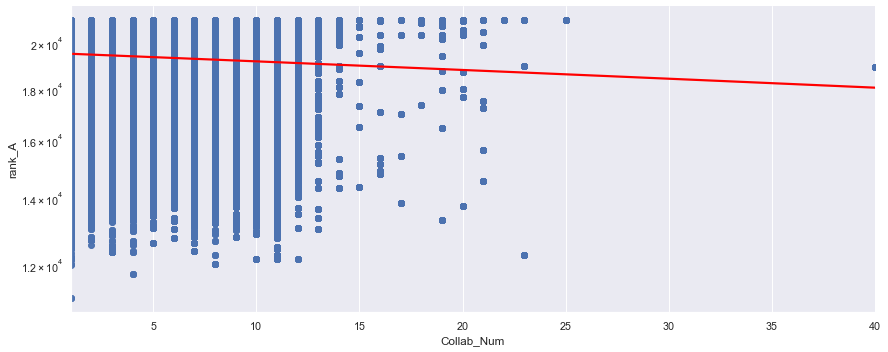

In [49]:
ax_rank_A = sns.lmplot(x='Collab_Num',y='rank_A',aspect=2.5,data=pair_net,ci=95,fit_reg=True,line_kws={'color': 'red'});
ax_rank_A.set(yscale="log")


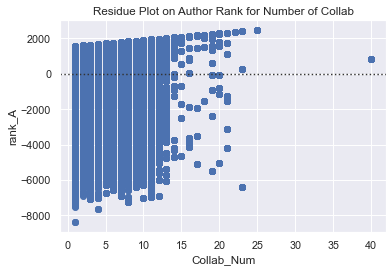

In [50]:
sns.residplot(y="rank_A", x="Collab_Num", data=pair_net)
plt.title("Residue Plot on Author Rank for Number of Collab")
plt.show()

# SNA by FOS

In [51]:
data.fos_list.unique()

array(['Medicine', 'Biology', 'Geology', 'Environmental science',
       'Computer science', 'Materials science', 'Mathematics',
       'Engineering', 'Chemistry', 'Physics', 'Business', 'Economics',
       'Art', 'Psychology', 'Philosophy', 'History', 'Geography',
       'Sociology', 'Political science'], dtype=object)

In [52]:
data_subj = pd.DataFrame(data[data.columns[[3,8,9,11]]], index=None)
data_subj.head()

,rank_P,fos_list,dcterms_creator,rank_A
0,24657,Medicine,2.700171e+09,21021.0
1,24657,Medicine,2.700171e+09,21021.0
2,24657,Medicine,2.700171e+09,21021.0
3,24050,Medicine,1.852443e+09,21075.0
4,24050,Medicine,1.852443e+09,21075.0


In [53]:
subject = pd.merge(auth_net,data_subj, how="left")

In [54]:
subject.drop_duplicates()
subject.head()

,dcterms_creator,Num_Unique_CoAuthors,new,coauth,rank_P,fos_list,rank_A
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09,21219,Geology,15554.0
1,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09,21219,Geography,15554.0
2,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2.620315e+09,23776,Geography,15554.0
3,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",3.012604e+09,21219,Geology,15554.0
4,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",3.012604e+09,21219,Geography,15554.0


In [55]:
fos_names = subject.fos_list.unique()

fosdict = {elem : pd.DataFrame() for elem in fos_names}

for key in fosdict.keys():
    fosdict[key] = data[:][data.fos_list == key]


In [56]:
fosdict['Medicine'].head()

,entity_id,entity_type,appearsInJournal,rank_P,referenceCount_P,appearsInConferenceInstance,citationCount_P,entity_idF,fos_list,dcterms_creator,...,rank_C,paperCount_C,citationCount_CS,entity_id_CS,rank_J,paperCount_J,citationCount_J,entity_id_J,Paper_Auth_Num,Cite_per_P
0,6320,NaN,NaN,24657,1,NaN,0,2778716859,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,17.600000
1,6320,NaN,NaN,24657,1,NaN,0,29456083,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,17.600000
2,6320,NaN,NaN,24657,1,NaN,0,71924100,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,17.600000
3,139580,NaN,NaN,24050,5,NaN,0,3017626604,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,17.737805
4,139580,NaN,NaN,24050,5,NaN,0,2779134260,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,17.737805


# Find COAUTHOR Stats - ANALYSIS


In [57]:
authors0 = pd.merge(auth_uniq,auth, how="left")
authors0['Num_Unique_CoAuthors'] = authors0.groupby('dcterms_creator')['Num_Unique_CoAuthors'].ffill()
authors = authors0.drop_duplicates('dcterms_creator', keep='first')
authors.reset_index(drop=True,inplace=True)

print(authors.shape)
authors.head()

(86076, 11)


,dcterms_creator,Num_Unique_CoAuthors,new,entity_id,fos_list,rank_A,paperCount_A,citationCount_A,rank_C,rank_J,Cite_per_P
0,400978.0,8,"(2620315329.0, 3012604226.0, 2114906500.0, 280...",2034197810,Geology,15554.0,121.0,1555.0,NaN,11171.0,12.851240
1,758859.0,2,"(2132930452.0, 2110535015.0)",765389370,Materials science,21075.0,8.0,2.0,NaN,NaN,0.250000
2,1011029.0,5,"(2041291329.0, 2144823554.0, 2133763109.0, 302...",2031586000,Art,16974.0,38.0,211.0,NaN,NaN,5.552632
3,1341902.0,1,"(2614587889.0,)",2616844950,Geography,18616.0,9.0,37.0,NaN,NaN,4.111111
4,1792001.0,9,"(2764590720.0, 2126783685.0, 191893929.0, 1941...",655227160,Chemistry,16262.0,123.0,0.0,NaN,NaN,0.000000


In [58]:
authors["Num_Unique_CoAuthors"].unique()

array([  8,   2,   5,   1,   9,   3,   4,   7,   6,  11,  14,  12,  43,
       103,  20,  10,  18,  22,  45,  27,  13,  17,  15,  36,  19,  24,
        16, 373,  26,  44,  90,  23,  29, 150,  21,  38,  25,  28,  31,
        50,  55,  63, 109,  65, 112,  46,  61, 521, 380, 200], dtype=int64)

In [59]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86076 entries, 0 to 86075
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dcterms_creator       86076 non-null  float64
 1   Num_Unique_CoAuthors  86076 non-null  int64  
 2   new                   86076 non-null  object 
 3   entity_id             86076 non-null  int64  
 4   fos_list              86076 non-null  object 
 5   rank_A                86076 non-null  float64
 6   paperCount_A          86076 non-null  float64
 7   citationCount_A       86076 non-null  float64
 8   rank_C                1148 non-null   float64
 9   rank_J                34527 non-null  float64
 10  Cite_per_P            86076 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 7.2+ MB


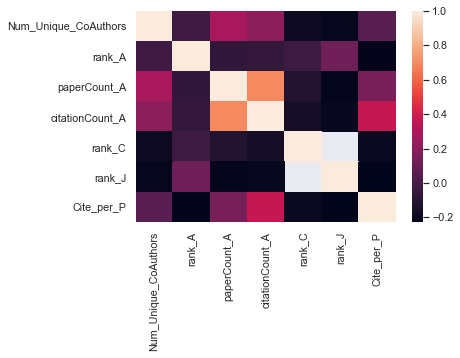

In [60]:
# DOES MORE UNIQUE AUTHORS CORRELATE TO A HIGHER AUTHOR RANK?

authors_corr = authors[authors.columns[[1,4,5,6,7,8,9,10]]]
#data_corr.corr()
sns.heatmap(authors_corr.corr());
#plt.title("Correlations Heatmap")

In [61]:
print("NUM OF UNIQUE AUTHORS")
print(authors_corr.corr()["Num_Unique_CoAuthors"])
print("\nCITATIONS PER PAPER")
print(authors_corr.corr()["Cite_per_P"])

NUM OF UNIQUE AUTHORS
Num_Unique_CoAuthors    1.000000
rank_A                 -0.023810
paperCount_A            0.283440
citationCount_A         0.199616
rank_C                 -0.187364
rank_J                 -0.210894
Cite_per_P              0.054937
Name: Num_Unique_CoAuthors, dtype: float64

CITATIONS PER PAPER
Num_Unique_CoAuthors    0.054937
rank_A                 -0.222157
paperCount_A            0.141466
citationCount_A         0.370221
rank_C                 -0.192852
rank_J                 -0.228853
Cite_per_P              1.000000
Name: Cite_per_P, dtype: float64


NUM OF UNIQUE AUTHORS
Num_Unique_CoAuthors    1.000000
rank_A                 -0.082411
paperCount_A            0.125382
citationCount_A         0.097599
rank_C                 -0.187364
rank_J                 -0.181190
Cite_per_P              0.088535
Name: Num_Unique_CoAuthors, dtype: float64

CITATIONS PER PAPER
Num_Unique_CoAuthors    0.088535
rank_A                 -0.252048
paperCount_A            0.195859
citationCount_A         0.460184
rank_C                 -0.192852
rank_J                 -0.276430
Cite_per_P              1.000000
Name: Cite_per_P, dtype: float64


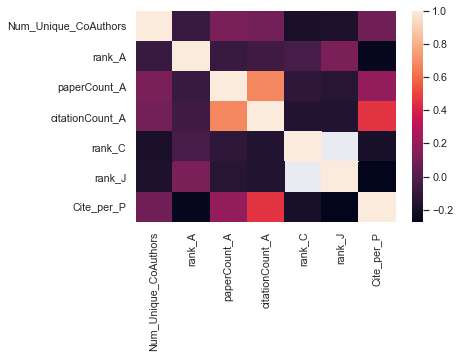

In [62]:
author_G = authors_corr[(authors_corr.Num_Unique_CoAuthors <= 50)&(authors_corr.Cite_per_P<=500)]

print("NUM OF UNIQUE AUTHORS")
print(author_G.corr()["Num_Unique_CoAuthors"])
print("\nCITATIONS PER PAPER")
print(author_G.corr()["Cite_per_P"])
sns.heatmap(author_G.corr());


WHY DO CITATIONS PER PAPER HAVE A NEGATIVE CORRELATION WITH AN AUTHOR'S RANK?????

In [31]:
auth_fields = authors_corr.groupby("fos_list")
#auth_fields[['Num_Unique_CoAuthors','paperCount_A']].corr()# .unstack().iloc[:,1]

#sns.heatmap(auth_fields[['Num_Unique_CoAuthors','rank_P']].corr());

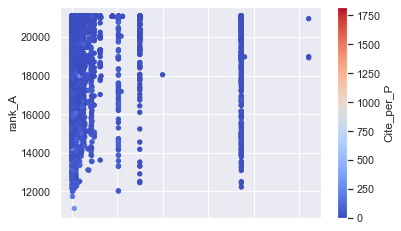

In [32]:
# How does having multiple authors compare to only having one author?
#auth_fields['Field Color'] = auth_fields['fos_list'].map({'A': 'Red', 'B': 'Blue'})
#ax = auth_fields.plot.scatter(x="Num_Unique_CoAuthors", y="rank_A", c="rank_P")
ax = authors.plot.scatter(x="Num_Unique_CoAuthors",y="rank_A",c="Cite_per_P",cmap='coolwarm')


In [11]:
sns.lmplot(x='Num_Unique_CoAuthors',y='rank_A',aspect=3,data=author_G,fit_reg=True,line_kws={'color': 'red'});  
#No real trend to see other than beginning, middle, and end have crests

NameError: name 'author_G' is not defined

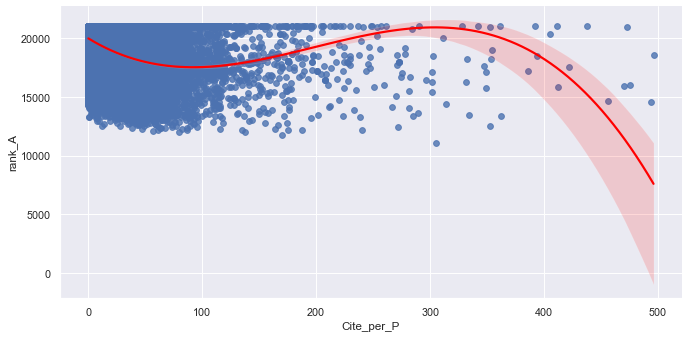

In [34]:
sns.lmplot(x='Cite_per_P',y='rank_A',aspect=2,data=author_G,ci=95,order=3,fit_reg=True,line_kws={'color': 'red'});  
#Want to have no citations or have 300?

In [69]:
authors_G = authors[(authors.Num_Unique_CoAuthors <= 15)&(authors.rank_A<=19000)]

fosss = pd.DataFrame(authors.groupby("fos_list").agg({'Num_Unique_CoAuthors': ['mean', 'min', 'max','std','count']}))
fosss

Num_Unique_CoAuthors                            
                                      mean min  max         std  count
fos_list                                                              
Art                               3.653389   1   43    5.705366   4042
Biology                           4.024852   1   36    4.151821   4547
Business                          2.845274   1   55    5.365596   6030
Chemistry                        38.860243   1  521  105.653083   4193
Computer science                  2.669065   1   15    2.182120   4170
Economics                         2.639221   1   18    2.669995   1591
Engineering                       3.119302   1   16    2.865653   1031
Environmental science             4.235250   1   61    4.335047  13407
Geography                         3.727643   1   25    3.725938   6877
Geology                           4.146138   1   44    4.424087   9580
History                           3.491359   1   22    3.824968   2546
Materials science                 3.764024   1   26    2.959343  10001
Mathematics                       3.651550   1  380    8.961664   4388
Medicine                          6.347718   1  109   13.311844   6048
Philosophy                        3.649518   1   26    4.892933   1555
Physics                          21.656707   1  150   44.238763   1506
Political science                 2.502041   1   13    2.339609    735
Psychology                        2.805041   1   12    2.519615   1349
Sociology                         3.462903   1   27    3.737698   2480

In [33]:
#BETWEEN FIELDS OF SCIENCE, WHICH ONE HAS MORE OR LESS COLLABORATION

#authors_G['Num_Unique_CoAuthors'].hist(by=authors_G['fos_list'], figsize = (16,18));
#authors_G.groupby("fos_list").boxplot(column="Num_Unique_CoAuthors", figsize=(16,18));

In [ ]:
#authors["Auth_Mean"] = authors.groupby("fos_list")['Num_Unique_CoAuthors'].mean().reset_index()